In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Descargas/entrenamiento.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data['tweet_length'] = data['text'].transform(lambda x: len(x.split()))
data

,id,keyword,location,text,target,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,10


In [5]:
datos_segun_longitud = data.groupby(['tweet_length']).agg({'target':['mean','count','sum']})
datos_segun_longitud.reset_index(inplace=True)
columns = ['Longitud','Promedio_Target','Cantidad_Tweets','Cantidad_Tweets_Con_Target_1']
datos_segun_longitud.columns = columns
datos_segun_longitud['Cantidad_Tweets_Con_Target_0'] = datos_segun_longitud['Cantidad_Tweets'] - datos_segun_longitud['Cantidad_Tweets_Con_Target_1']
datos_segun_longitud.head()

,Longitud,Promedio_Target,Cantidad_Tweets,Cantidad_Tweets_Con_Target_1,Cantidad_Tweets_Con_Target_0
0,1,0.000000,8,0,8
1,2,0.117647,34,4,30
2,3,0.173333,75,13,62
3,4,0.208696,115,24,91
4,5,0.245283,159,39,120


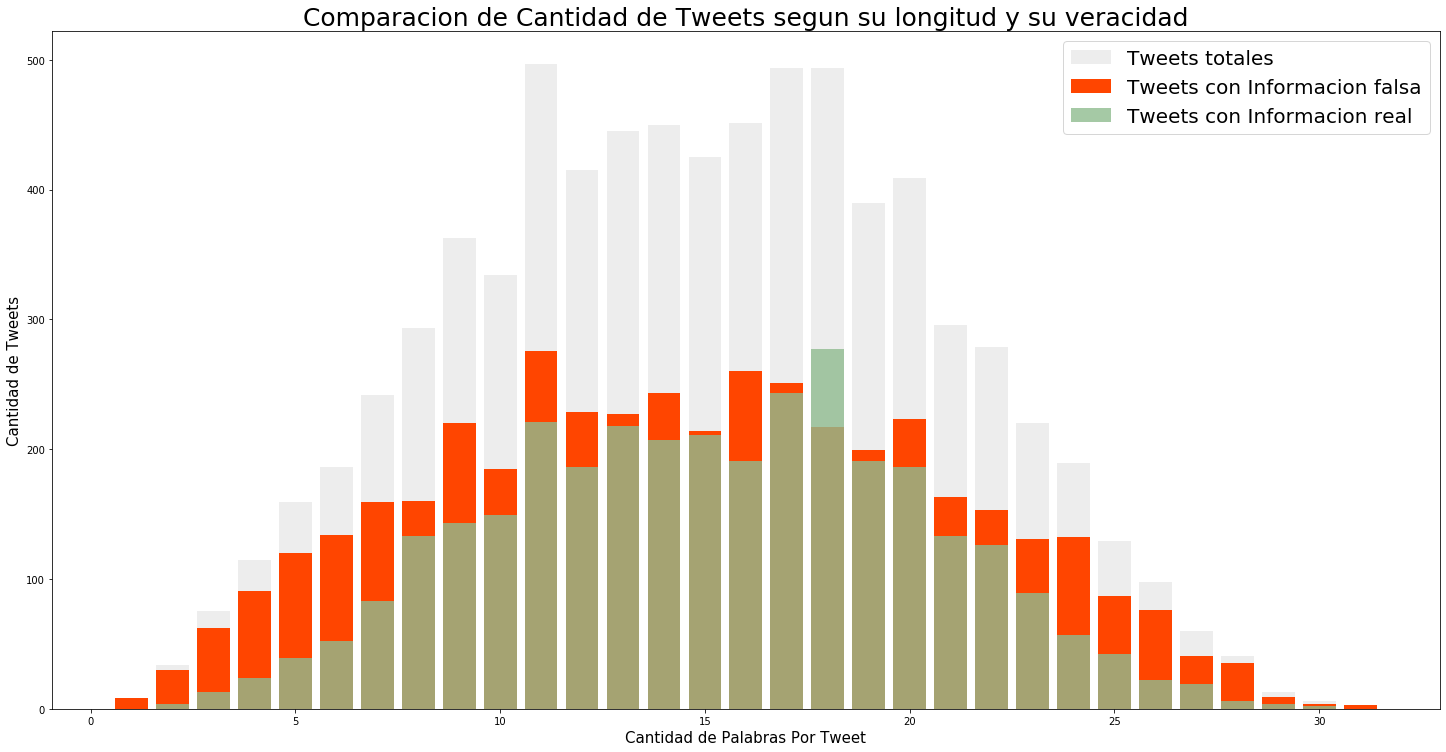

In [48]:
fig,ax = plt.subplots(figsize=(20,10))

fig.tight_layout()

ax.bar(datos_segun_longitud['Longitud'],datos_segun_longitud['Cantidad_Tweets'],label='Tweets totales',alpha= 0.2,color='darkgrey')
ax.bar(datos_segun_longitud['Longitud'],datos_segun_longitud['Cantidad_Tweets_Con_Target_0'],label='Tweets con Informacion falsa',alpha=1,color='orangered')
ax.bar(datos_segun_longitud['Longitud'],datos_segun_longitud['Cantidad_Tweets_Con_Target_1'],label='Tweets con Informacion real',alpha=0.8,color='darkseagreen')
ax.legend(prop={'size':20})
ax.set_ylabel('Cantidad de Tweets',size=15)
ax.set_title('Comparacion de Cantidad de Tweets segun su longitud y su veracidad',size=25)
ax.set_xlabel('Cantidad de Palabras Por Tweet',size=15)
plt.savefig('Finger.png',bbox_inches='tight')
plt.show()



In [31]:
data = pd.read_csv('../Descargas/entrenamiento.csv')
data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [8]:
palabras_por_separado = data
palabras_por_separado.set_index(['id','target'],inplace=True)


In [9]:
import re 
from string import punctuation


palabras_por_separado = palabras_por_separado['text'].str.split(expand=True).stack().to_frame()

In [10]:
palabras_por_separado.columns = ['word']
palabras_por_separado['word'] = palabras_por_separado['word'].str.replace(rf'[{punctuation}]', '')

In [11]:
palabras_por_separado.reset_index(inplace=True)
del palabras_por_separado['level_2']

In [12]:
from wordcloud import WordCloud,STOPWORDS

palabras_de_tweets_reales = palabras_por_separado.loc[palabras_por_separado['target'] == 1]



In [13]:
palabras_de_tweets_reales.loc[palabras_de_tweets_reales['word'] == 'thi']

,id,target,word


In [14]:
lista_palabras = palabras_de_tweets_reales['word'].to_list()
string_palabras = " ".join(word for word in lista_palabras)
string_palabras = string_palabras.lower()

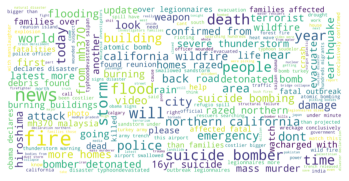

In [64]:
wc = WordCloud(min_word_length = 4,background_color= 'white',min_font_size= 40,max_font_size = 300,max_words = 200,width = 5000,height = 2500).generate(string_palabras)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('PalabrasReales.png',bbox_inches='tight')
plt.show()


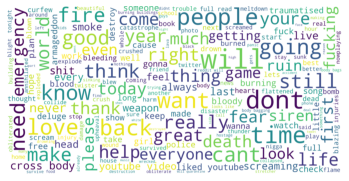

In [63]:
palabras_de_tweets_falsas = palabras_por_separado.loc[palabras_por_separado['target'] == 0]
lista_palabras_falsas= palabras_de_tweets_falsas['word'].to_list()
string_palabras_falsas = " ".join(word for word in lista_palabras_falsas)
string_palabras_falsas = string_palabras_falsas.lower()
string_palabras_falsas
wc2 = WordCloud(min_word_length = 4,background_color= 'white',min_font_size= 40,max_font_size = 400,max_words = 200,width = 5000,height = 2500).generate(string_palabras_falsas)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('PalabrasFalsas.png',bbox_inches='tight')
plt.show()


In [17]:
data = pd.read_csv('../Descargas/entrenamiento.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Quiero ver si existe una relacion entre la cantidad de mayusculas de un mensaje y la veracidad o falsedad
Para eso busco el porcentaje de mayusculas que tiene cada mensaje y genero una visualizacion de la relacion

In [18]:
porcentaje_mayusculas = data
porcentaje_mayusculas['cant_mayusculas'] = porcentaje_mayusculas['text'].apply(lambda x: sum(1 for c in x if c.isupper()))

In [19]:
porcentaje_mayusculas['cant_caracteres'] = porcentaje_mayusculas['text'].apply(lambda x: len(x))
porcentaje_mayusculas['porcentaje_mayusculas'] = (porcentaje_mayusculas['cant_mayusculas']/porcentaje_mayusculas['cant_caracteres'])*100
porcentaje_mayusculas['porcentaje_minusculas'] = 100 - porcentaje_mayusculas['porcentaje_mayusculas']
porcentaje_mayusculas.head()

,id,keyword,location,text,target,cant_mayusculas,cant_caracteres,porcentaje_mayusculas,porcentaje_minusculas
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,10,69,14.492754,85.507246
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,5,38,13.157895,86.842105
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,2,133,1.503759,98.496241
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65,1.538462,98.461538
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,3,88,3.409091,96.590909


In [72]:
data = pd.read_csv('../Descargas/entrenamiento.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [73]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [74]:
dic = list(dict.fromkeys(data['keyword'].to_list()))
dic.pop(0)
for word in dic:
    index = dic.index(word)
    dic[index] = word.replace('%20',' ')

In [75]:
import re
def suma_de_keywords(lista,string):
    x= 0
    for word in lista:
        x += 1 if (word in string.lower()) else 0
    return x
        

In [76]:
data['cant_keywords'] = data['text'].apply(lambda x: suma_de_keywords(dic,x))
pd.set_option('display.max_colwidth', -1)

In [82]:
df = data.loc[data['cant_keywords'] <= 5]

In [26]:
nueva_data = data.loc[data['cant_keywords'] == 0]
nueva_data

,id,keyword,location,text,target,cant_keywords
15,23,NaN,NaN,what's up man?,0,0
16,24,NaN,NaN,i love fruits,0,0
17,25,NaN,NaN,summer is lovely,0,0
18,26,NaN,NaN,my car is so fast,0,0
19,28,NaN,NaN,what a goooooooaaaaaal!!!!!!,0,0
20,31,NaN,NaN,this is ridiculous....,0,0
21,32,NaN,NaN,london is cool ;),0,0
22,33,NaN,NaN,love skiing,0,0
23,34,NaN,NaN,what a wonderful day!,0,0
24,36,NaN,NaN,looooool,0,0


In [84]:
relacion_cant = df.groupby(['cant_keywords']).agg({'target':'mean'})
relacion_cant['proporcion_0'] = 1 - relacion_cant['target']
relacion_cant.columns = ['Proporcion de 1','Proporcion de 0']

In [85]:
relacion_cant

,Proporcion de 1,Proporcion de 0
cant_keywords,,
0,0.167677,0.832323
1,0.327332,0.672668
2,0.520584,0.479416
3,0.794498,0.205502
4,0.840491,0.159509
5,0.956522,0.043478


In [94]:
import seaborn as sns

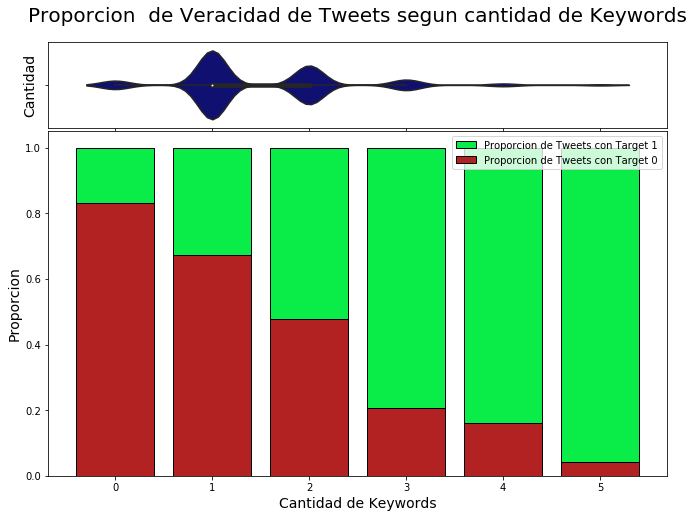

In [110]:
f,(ax_viol,ax_stack) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(.2,.8)},figsize=(10,7))
color = ["#0aec48","firebrick"]
color_violin = 'navy'
ax_viol.set_title("Proporcion  de Veracidad de Tweets segun cantidad de Keywords",size=20,pad=20)

x = relacion_cant.index
y =relacion_cant['Proporcion de 1']
z =relacion_cant['Proporcion de 0']
j = df['cant_keywords']
sns.violinplot(j,ax=ax_viol,color=color_violin,pad=8.0)
ax_stack.bar(x,y,bottom=z,color = "#0aec48",edgecolor='black',label = "Proporcion de Tweets con Target 1")
ax_stack.bar(x,z,color = "firebrick",edgecolor='black',label = "Proporcion de Tweets con Target 0")

ax_stack.legend(loc='upper right')
ax_viol.set_ylabel("Cantidad",fontsize=14)
ax_viol.set_xlabel("")
ax_stack.set_xlabel("Cantidad de Keywords",fontsize=14)
ax_stack.set_ylabel("Proporcion",fontsize = 14)
f.tight_layout(pad=0)
plt.savefig('Cantidad_Keywords.png',bbox_inches='tight')
plt.show()


In [33]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [54]:
locations = data.groupby(['location','target']).agg({'text':'count'})

In [56]:
locations.head(200)

,,text
location,target,
,1,1
Glasgow,0,1
"Melbourne, Australia",0,1
News,1,1
å_,0,1
45å¡ 5'12.53N 14å¡ 7'24.93E,0,1
"616 Û¢ Kentwood , MI",1,1
? ??????? ? ( ?? å¡ ? ? ? å¡),1,1
?currently writing a book?,0,1
